<a href="https://colab.research.google.com/github/chizuchizu/IOAI/blob/main/Task3/chizu_006_task3_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import importlib

if importlib.util.find_spec('datasets') is None:
    !pip install -q torch==2.2.1 transformers==4.39.1 diffusers==0.27.2 torchvision==0.17.1 datasets==2.18.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.0/166.0 MB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 167.9/167.9 MB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 91.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 16.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 28.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 20.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21.3 MB 73.1 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchaudio 2.3.0+cu121 requires torch==2.3.0, but you have torch 2.2.1 which is incompatible.
torchtext 0.18.0 requires torch>=2.3.0, but you have torch 2.2.1 which is incompatible.


In [6]:
# ====================================================
# CFG
# ====================================================

class CFG:
    num_workers=4
    project = "IOAI_Task3"
    name = "chizu_002"
    base_model_name="lambdalabs/miniSD-diffusers"
    dataset_path = "/content/drive/MyDrive/dataset/COCO_10000_extracted"
    size=600
    scheduler='CosineAnnealingLR' # ['ReduceLROnPlateau', 'CosineAnnealingLR', 'CosineAnnealingWarmRestarts']

    learning_rate = 2e-05
    resolution = 256
    max_train_steps = 2000
    train_batch_size = 8

    eval_steps = 500

    #factor=0.2 # ReduceLROnPlateau
    #patience=4 # ReduceLROnPlateau
    #eps=1e-6 # ReduceLROnPlateau
    T_max=6 # CosineAnnealingLR
    #T_0=6 # CosineAnnealingWarmRestarts
    lr=1e-4
    min_lr=1e-6
    weight_decay=1e-6
    gradient_accumulation_steps=1
    max_grad_norm=1000
    seed=42
    train=True

    prompts = [
        "A curious zebra standing tall in a lush African savanna at sunrise, with acacia trees in the background.",
        "Next to a medieval castle, a regal zebra observes the knights and a drawbridge.",
        "Wearing a scarf, a fashionable giraffe strolls through a bustling city street with skyscrapers.",
        "Running along a sandy beach, a playful giraffe enjoys the palm trees, ocean waves, and a bright sunset.",
        "By a serene lakeside, a relaxed bear drinks water with mountains and a clear blue sky in the background.",
        "In a snowy forest, a cozy bear stands under snow-covered trees, enjoying the gentle snowfall.",
        "Partially hidden in a dense tropical rainforest, an adventurous sheep peeks through leafy plants.",
        "A sleek sheep with modern accessories navigates a futuristic city with flying cars and neon lights.",
    ]

In [7]:
cfg = dict(vars(CFG))
cfg = {k: v for k, v in cfg.items() if "__" not in k}
cfg


{'num_workers': 4,
 'project': 'IOAI_Task3',
 'name': 'chizu_002',
 'base_model_name': 'lambdalabs/miniSD-diffusers',
 'dataset_path': '/content/drive/MyDrive/dataset/COCO_10000_extracted',
 'size': 600,
 'scheduler': 'CosineAnnealingLR',
 'learning_rate': 2e-05,
 'resolution': 256,
 'max_train_steps': 2000,
 'train_batch_size': 8,
 'eval_steps': 500,
 'T_max': 6,
 'lr': 0.0001,
 'min_lr': 1e-06,
 'weight_decay': 1e-06,
 'gradient_accumulation_steps': 1,
 'max_grad_norm': 1000,
 'seed': 42,
 'train': True,
 'prompts': ['A curious zebra standing tall in a lush African savanna at sunrise, with acacia trees in the background.',
  'Next to a medieval castle, a regal zebra observes the knights and a drawbridge.',
  'Wearing a scarf, a fashionable giraffe strolls through a bustling city street with skyscrapers.',
  'Running along a sandy beach, a playful giraffe enjoys the palm trees, ocean waves, and a bright sunset.',
  'By a serene lakeside, a relaxed bear drinks water with mountains and 

In [9]:
from diffusers import AutoPipelineForText2Image
import torch



In [10]:
!mkdir -p data/train

In [11]:
prompts = [
"A giraffe navigating a maze of mirrors, trying to find its way out.",
"In a futuristic city, a giraffe tries to blend in with the crowd during a secret underground concert.",
"During a snowstorm in Antarctica, scientists discover a giraffe that seems unaffected by the extreme cold.",
"At a circus in the 1800s, a giraffe escapes its enclosure and causes chaos among the performers.",
"In a submarine deep in the ocean, a giraffe is observed swimming gracefully alongside exotic sea creatures.",
"On a space station orbiting Jupiter, a giraffe unexpectedly materializes due to a teleportation experiment gone wrong.",
"In a medieval castle, a giraffe is rumored to be the enchanted form of a disgraced prince.",
"Inside a giant hourglass, a giraffe tries to find a way to escape the shifting sands.",
"In an enchanted forest, a giraffe learns to communicate with fairies and other magical creatures.",
"During a time-travel experiment, a giraffe from the Jurassic period ends up in modern-day New York City.",
"In a virtual reality game, players encounter a giraffe that offers cryptic clues to unlock the next level.",
"At a high-tech laboratory, scientists discover a giraffe that possesses telekinetic powers.",
"In a parallel universe where animals rule, a giraffe is the chief negotiator between warring factions.",
"During a zombie apocalypse, a giraffe becomes the unlikely leader of a group of survivors.",
"In a steampunk world, a giraffe is part of an elite group of aerial explorers.",
"On a deserted island, a giraffe befriends a castaway and helps them survive.",
"Inside a haunted mansion, a giraffe is rumored to be the ghost of a former resident.",
"In a bustling marketplace in ancient Rome, a giraffe is sold to entertain the emperor's court.",
"During a volcanic eruption, a giraffe seeks shelter in a cave with ancient cave paintings.",
"In a cyberpunk cityscape, a giraffe is the subject of a rogue AI's experiment in creating sentient beings.",
"At a masquerade ball, a giraffe disguised in elaborate attire charms the guests with its grace.",
"Inside a giant beehive, a giraffe develops a unique symbiotic relationship with the bees.",
"In a wizard's laboratory, a giraffe accidentally drinks a potion that gives it the ability to speak.",
"During a heist at a museum, a giraffe is mistaken for a valuable artifact and stolen.",
"In a post-apocalyptic world, a giraffe accompanies a nomadic tribe searching for a safe haven.",
"At a fashion show in Paris, a giraffe models avant-garde designs created specifically for its stature.",
"Inside a magician's hat, a giraffe appears during a children's birthday party.",
"In an underwater city inhabited by mermaids, a giraffe is discovered swimming gracefully in the ocean depths.",
"During a political summit, a giraffe becomes the unexpected mediator between conflicting nations.",
"In a parallel dimension where gravity works differently, a giraffe learns to navigate the upside-down landscape.",
"At a space colony on Mars, a giraffe becomes the mascot for the first interplanetary sports team.",
"Inside an artist's surreal painting, a giraffe interacts with other surreal creatures.",
"During a safari tour, a giraffe guides tourists through the savannah, sharing its knowledge of the land.",
"In a futuristic courtroom, a giraffe is the defendant in a trial that challenges the laws of nature.",
"At an underwater research station, scientists observe a giraffe adapting to life in an aquatic environment.",
"During a music festival in the Amazon rainforest, a giraffe dances to tribal rhythms with indigenous tribes.",
"In a ghost town in the Old West, a giraffe is rumored to guard buried treasure.",
"Inside a wizard's labyrinth, a giraffe navigates through shifting corridors and magical traps.",
"During a lunar eclipse, a giraffe on a lunar base unexpectedly gains the ability to communicate with Earth.",
"In a botanical garden of alien plants, a giraffe discovers a flower that grants temporary superpowers.",
"At an intergalactic zoo, a giraffe is housed alongside creatures from across the universe.",
"Inside a computer simulation, a giraffe discovers it can alter the virtual environment with its thoughts.",
"During a time-travel experiment, a giraffe from ancient Egypt ends up in modern-day Tokyo.",
"In a world where dreams come alive, a giraffe embarks on adventures in the dreamscapes of children.",
"At a carnival in a steampunk universe, a giraffe rides a mechanical carousel with other fantastical creatures.",
"Inside a painter's studio, a giraffe becomes the muse for a series of surrealistic artworks.",
"During a meteor shower, a giraffe discovers a crashed spaceship hidden in the jungle.",
"In a biodome on Mars, a giraffe is part of an experiment to test the feasibility of terrestrial animals on the red planet.",
"A zebra unexpectedly leading a team of penguins through a labyrinthine ice cave system.",
"Scientists conducting a psychological experiment on a zebra that appears to have developed rudimentary language skills.",
"A zebra navigating a bustling city using public transportation during rush hour.",
"A zebra becoming the captain of a pirate ship crewed by various species of animals.",
"A zebra participating in a high-stakes poker game against a group of cunning raccoons.",
"A zebra organizing a concert where different species of birds perform classical music.",
"A zebra discovering an ancient artifact buried deep within a jungle temple.",
"A zebra teaching a group of kittens how to synchronize swim in a pond.",
"A zebra training alongside a team of squirrels for an upcoming acrobatics competition.",
"A zebra designing a new fashion line for a prestigious animal fashion show.",
"A zebra trying to solve a complex mathematical equation on a chalkboard.",
"A zebra negotiating a peace treaty between two warring ant colonies.",
"A zebra attempting to break the world record for the longest non-stop flight by an avian species.",
"A zebra leading a rescue mission to save a group of trapped mountain climbers.",
"A zebra conducting a cooking class for a group of curious meerkats.",
"A zebra running a detective agency specializing in solving mysteries in the African savanna.",
"A zebra participating in a synchronized swimming competition with a pod of dolphins.",
"A zebra learning how to operate a hot air balloon for an expedition to the North Pole.",
"A zebra organizing a charity fundraiser for endangered species conservation.",
"A zebra coaching a team of insects for an annual soccer tournament.",
"A zebra coordinating a search and rescue mission for a lost group of hikers in the desert.",
"A zebra developing a new eco-friendly technology to clean polluted rivers.",
"A zebra forming a jazz band with a group of nocturnal animals.",
"A zebra hosting a radio talk show discussing current events in the animal kingdom.",
"A zebra building a makeshift submarine to explore underwater caves.",
"A zebra leading a geological expedition to study volcanic activity.",
"A zebra creating a virtual reality simulation to teach baby turtles how to navigate the ocean currents.",
"A zebra coaching a team of young elephants in a game of elephant soccer.",
"A zebra organizing a diplomatic summit between underwater and land-dwelling creatures.",
"A zebra choreographing a dance routine for a group of flamingos.",
"A zebra attempting to decipher an ancient hieroglyphic script in an archaeological dig site.",
"A zebra piloting a hot air balloon across the Amazon rainforest.",
"A zebra hosting a wildlife photography exhibition featuring photographs taken by various animals.",
"A zebra training a group of otters in the art of synchronized diving.",
"A zebra leading an expedition to study the migration patterns of wildebeests.",
"A zebra directing a nature documentary about the life cycle of butterflies.",
"A zebra organizing a talent show for animals to showcase their unique abilities.",
"A zebra conducting an experiment to test the effects of music on plant growth.",
"A zebra navigating through a maze designed by an eccentric owl architect.",
"A zebra designing a new eco-friendly habitat for endangered frogs.",
"A zebra leading a team of astronauts on a mission to explore a distant planet.",
"A zebra organizing a beach cleanup initiative with a group of sea turtles.",
"A zebra coordinating an emergency response team during a natural disaster.",
"A zebra participating in a synchronized skydiving performance with a team of eagles.",
"A zebra training a group of cheetahs in endurance running techniques.",
"A zebra leading an archaeological expedition to uncover ancient ruins in the desert.",
"A zebra organizing a wildlife conservation conference to address global environmental issues.",
"A sheep wearing a jetpack zooms across the night sky, dodging fireworks.",
"In a bustling city square, a sheep stands as a street performer, juggling oranges.",
"At a high-tech laboratory, scientists observe a sheep operating a complex machinery.",
"Deep in a forest, a sheep navigates a labyrinth of mirrored walls.",
"On a pirate ship, a sheep oversees the navigation, holding an ancient map.",
"In a medieval castle, a sheep sits on a throne while knights kneel before it.",
"On Mars, a sheep explores the red desert in a spacesuit.",
"At a circus, a sheep balances on a tightrope above a roaring crowd.",
"Inside a submarine, a sheep assists the crew in repairing a malfunctioning engine.",
"In a courtroom, a sheep acts as a judge, banging a gavel.",
"At a futuristic sports arena, a sheep competes in a zero-gravity soccer match.",
"In a haunted mansion, a sheep guides paranormal investigators with a lantern.",
"On a film set, a sheep directs actors in a historical drama.",
"At a music concert, a sheep plays a guitar solo to an adoring audience.",
"In a laboratory, a sheep peers through a microscope at microorganisms.",
"In a jungle, a sheep leads a team of explorers through dense foliage.",
"In a space station, a sheep floats weightlessly while conducting experiments.",
"At a fashion show, a sheep models avant-garde designer clothing.",
"On a hot air balloon, a sheep assists in navigating through stormy skies.",
"In a casino, a sheep rolls the dice at a crowded craps table.",
"At a ski resort, a sheep races down a slope with professional skiers.",
"In a boardroom, a sheep presents a business proposal to skeptical executives.",
"At an art gallery, a sheep examines abstract paintings with a monocle.",
"On a submarine, a sheep assists in decoding a cryptic distress signal.",
"In a steampunk city, a sheep operates a steam-powered dirigible.",
"At a wedding, a sheep stands as the officiant, conducting the ceremony.",
"In a detective's office, a sheep analyzes clues on a murder board.",
"On a space mission, a sheep oversees the deployment of a satellite.",
"In a desert oasis, a sheep sips tea while reclining on a silk pillow.",
"In a classroom, a sheep teaches calculus to puzzled students.",
"At a dog show, a sheep judges a competition of various breeds.",
"In an archaeological dig, a sheep uncovers ancient artifacts buried for centuries.",
"At a culinary competition, a sheep serves as a judge tasting gourmet dishes.",
"In a VR simulation, a sheep explores a virtual world of pixelated landscapes.",
"In a library, a sheep reads ancient scrolls under the dim glow of candlelight.",
"At a race track, a sheep drives a Formula 1 car at breakneck speeds.",
"In a courtroom, a sheep gives a passionate closing argument to the jury.",
"At a space colony, a sheep tends to hydroponic gardens for sustenance.",
"In a ballet studio, a sheep practices graceful pirouettes alongside ballerinas.",
"At a theme park, a sheep operates a roller coaster with precision.",
"In a robotics lab, a sheep interacts with humanoid robots undergoing tests.",
"At an underwater observatory, a sheep observes rare deep-sea creatures.",
"In a medieval tournament, a sheep competes in jousting against knights.",
"At a film studio, a sheep stars in a Hollywood blockbuster action scene.",
"In a courtroom, a sheep stands trial, defended by a team of lawyers.",
"At a lunar base, a sheep participates in lunar rock collection for analysis.",
"In a fantasy kingdom, a sheep advises the queen on matters of state.",
"At a circus, a sheep performs acrobatics on a trapeze to awe-inspired spectators.",
"A bear inexplicably joins a group of penguins on an Antarctic expedition.",
"During a heated UN summit, a bear interrupts negotiations by stealing the chief negotiator's briefcase, which contains crucial documents.",
"In the midst of a bustling city, a bear takes over a hot dog stand and begins selling its own version of gourmet bear-themed hot dogs.",
"At a prestigious art gallery opening, a bear accidentally knocks over a priceless sculpture, causing chaos among the attendees.",
"During a live television broadcast of a cooking competition, a bear wanders onto the set and starts taste-testing dishes.",
"At a high-stakes poker tournament in Las Vegas, a bear decides to sit at one of the tables and bluff with the best of them.",
"In a futuristic space station, a bear manages to stow away on a spaceship and causes havoc in zero gravity.",
"In a courtroom drama, a bear is called as an unexpected witness in a high-profile case involving corporate espionage.",
"In a medieval fantasy setting, a bear becomes the unlikely companion of a young squire on a quest to rescue a kidnapped princess.",
"During a marathon race through the desert, a bear joins the runners and manages to keep up, surprising everyone with its endurance.",
"At a glamorous Hollywood awards ceremony, a bear sneaks onto the stage and tries to accept an award meant for a famous actor.",
"In a quiet suburban neighborhood, a bear takes up residence in an abandoned house and becomes the talk of the town.",
"During a world chess championship, a bear somehow manages to make moves on one of the boards, disrupting the game.",
"In a remote jungle research station, scientists discover a bear that seems to have developed an unusual ability to communicate with primates.",
"At a prestigious scientific conference, a bear accidentally triggers an experiment that leads to unexpected results.",
"During a classical music concert at a grand opera house, a bear wanders onto the stage and begins conducting the orchestra.",
"In a post-apocalyptic wasteland, a bear forms an unlikely alliance with a group of survivors to defend against marauding bandits.",
"At a high-society wedding reception, a bear crashes the event and ends up stealing the wedding cake.",
"During a Formula 1 race, a bear manages to sneak onto the track and causes a brief interruption, to the amazement of the crowd.",
"In a cyberpunk cityscape, a bear becomes an underground sensation for its ability to navigate the digital world.",
"During a high-altitude mountaineering expedition, a bear unexpectedly joins the climbers and reaches the summit.",
"In a deep-sea exploration mission, a bear is discovered swimming alongside researchers in a state-of-the-art submarine.",
"At a prestigious university, a bear becomes the subject of a controversial research project investigating its intelligence.",
"During a Broadway musical performance, a bear wanders onstage and starts dancing in sync with the performers.",
"In a top-secret government facility, a bear accidentally triggers a security breach while exploring the premises.",
"At a professional golf tournament, a bear appears on the course and starts playfully batting golf balls with its paws.",
"During a tense hostage situation, negotiators are surprised to find that a bear has somehow become involved in the standoff.",
"In a competitive e-sports tournament, a bear disrupts the match by playfully swatting at the players' screens.",
"At a prestigious wine-tasting event, a bear manages to sneak in and starts sampling the finest wines on offer.",
"During a scientific expedition to Antarctica, researchers discover a bear living among a colony of emperor penguins.",
"In a futuristic courtroom, a bear is put on trial for a crime it allegedly committed using advanced AI technology.",
"At an international space station, astronauts are shocked to find a bear stowed away on a resupply mission.",
"During a circus performance, a bear escapes from its enclosure and joins the acrobats in a daring high-wire act.",
"In a bustling market square, a bear starts a food stall selling its own recipe of honey-infused pastries.",
"During a tense diplomatic summit, a bear emerges from the nearby forest and attempts to engage in the negotiations.",
"In a haunted castle, a bear becomes an unexpected ally to a group of ghost hunters searching for paranormal activity.",
"At a futuristic fashion show, a bear somehow ends up on the catwalk, modeling the latest designer outfits.",
"During a live TV broadcast of a wildlife documentary, a bear surprises the camera crew by taking over the narration.",
"In a space colony on Mars, a bear becomes a beloved mascot among the colonists, despite being an Earth species.",
"At a major international art auction, a bear manages to sneak in and bids on a famous painting, causing a commotion.",
"During a Formula E race in a city center, a bear manages to hitch a ride on one of the racing cars, shocking spectators.",
"In a high-security prison, guards discover a bear that has managed to break into the facility and explore its surroundings.",
"At a prestigious film festival, a bear wanders onto the red carpet and starts posing for photographs with the celebrities.",
"During a music festival in the desert, a bear becomes an unexpected DJ, mixing tracks to the delight of the crowd.",
"In a futuristic underwater city, a bear becomes a sensation for its ability to navigate the complex maze of underwater tunnels.",
"At an international robotics competition, a bear accidentally activates one of the robots and causes it to perform a dance routine.",
"During a tense standoff between protesters and police, a bear emerges from the crowd and tries to mediate the conflict.",
"In a remote village in the Himalayas, villagers discover a bear that has taken up residence in an abandoned monastery.",
"During a military exercise in the Arctic, soldiers are startled to find a bear wandering through their training grounds.",
"At a prestigious horse racing event, a bear somehow manages to join the race and competes against the thoroughbreds.",
"In a futuristic amusement park, a bear becomes a popular attraction for its ability to interact with visitors in unexpected ways.",
]

prompts = list(set(prompts))
len(prompts)


194

In [22]:
import os
from tqdm import tqdm
import pandas as pd

base_dir = "data/train"

In [18]:
def make_data():
    pipe = AutoPipelineForText2Image.from_pretrained("stabilityai/sdxl-turbo", torch_dtype=torch.float16, variant="fp16")
    pipe.to("cuda")
    pipe.set_progress_bar_config(disable=True)
    def generate(prompt):
        image = pipe(prompt=prompt, num_inference_steps=1, guidance_scale=.0).images[0]
        return image

    ids = []
    paths = []
    final_prompts = []
    for i in tqdm(range(len(prompts))):
        prompt = prompts[i]
        if prompt in final_prompts:
            continue
        final_prompts.append(prompt)
        path = os.path.join(base_dir, f"{i}.png")
        image = generate(prompt)
        image.save(path)
        # ids.append(i)
        paths.append(path)

    del pipe
    df = pd.DataFrame(
        {
            "promprt": prompts,
            "paths": paths,
        }
    )
    return df

In [19]:
df = make_data()

Cannot initialize model with low cpu memory usage because `accelerate` was not found in the environment. Defaulting to `low_cpu_mem_usage=False`. It is strongly recommended to install `accelerate` for faster and less memory-intense model loading. You can do so with: 
```
pip install accelerate
```
.


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

100%|██████████| 194/194 [01:23<00:00,  2.32it/s]


In [20]:
import gc
import torch

def flush():
  gc.collect()
  torch.cuda.empty_cache()
flush()

In [21]:


df

promprt               paths
0    At a masquerade ball, a giraffe disguised in e...    data/train/0.png
1    A zebra participating in a high-stakes poker g...    data/train/1.png
2    A sheep wearing a jetpack zooms across the nig...    data/train/2.png
3    Inside a submarine, a sheep assists the crew i...    data/train/3.png
4    During a Formula 1 race, a bear manages to sne...    data/train/4.png
..                                                 ...                 ...
189  Inside a giant hourglass, a giraffe tries to f...  data/train/189.png
190  A zebra hosting a radio talk show discussing c...  data/train/190.png
191  At a prestigious art gallery opening, a bear a...  data/train/191.png
192  At a circus, a sheep performs acrobatics on a ...  data/train/192.png
193  During a world chess championship, a bear some...  data/train/193.png

[194 rows x 2 columns]

In [23]:
df.to_csv("data/data.csv")

In [24]:
# prompt: Using dataframe df: make a pytorch dataset, load image from path

import torch
from torchvision import transforms
from PIL import Image

class CustomDataset(torch.utils.data.Dataset):
    def __init__(self, dataframe, transform):
        self.dataframe = dataframe
        self.transform = transform

    def __len__(self):
        return len(self.dataframe)

    def __getitem__(self, idx):
        path = self.dataframe.iloc[idx, 1]
        prompt = self.dataframe.iloc[idx, 0]
        image = Image.open(path)
        example = {
            "image": image,
            "text": prompt
        }
        if self.transform is not None:
            example = self.transform(example)
        return example



In [25]:
!pip install -q wandb

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 18.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 30.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 300.2/300.2 kB 36.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 10.6 MB/s eta 0:00:00


In [26]:
from torch.utils.data import DataLoader
import math
import numpy as np
import torch
import torch.nn.functional as F
import torch.utils.checkpoint
from datasets import load_dataset, load_from_disk
from torchvision import transforms
from diffusers import DiffusionPipeline
from tqdm.auto import tqdm
import wandb

In [27]:
from google.colab import userdata
wandb.login(key=userdata.get('wandb_token'))

wandb: W&B API key is configured. Use `wandb login --relogin` to force relogin
wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


True

In [28]:
def seed_everything(seed):
    torch.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)
    np.random.seed(seed)

def terminate_session():
    # Terminate this session

    from google.colab import runtime
    runtime.unassign()

seed_everything(CFG.seed)

In [29]:
def generation_loop(pipe, prompts):
    imgs = []
    for prompt in prompts:
        image = pipe(prompt, width=256, height=256).images[0]
        imgs.append(image)
    return imgs

In [30]:
def main():
    wandb.init(
        name=CFG.name,
        project=CFG.project,
        config=cfg
    )


    # ds = load_from_disk(CFG.dataset_path)
    # dataset = CustomDataset(df)

    # Extract the individual components
    pipe = DiffusionPipeline.from_pretrained(CFG.base_model_name)
    pipe.to('cuda')
    vae = pipe.vae
    text_encoder = pipe.text_encoder
    tokenizer = pipe.tokenizer
    unet = pipe.unet
    noise_scheduler = pipe.scheduler

    # Freeze vae and text_encoder and set unet to trainable
    vae.requires_grad_(False)
    text_encoder.requires_grad_(False)
    unet.train()

    optimizer = torch.optim.AdamW(unet.parameters(), lr=CFG.learning_rate)

    # Preprocessing the datasets.
    train_transforms = transforms.Compose(
        [
            transforms.Resize(CFG.resolution, interpolation=transforms.InterpolationMode.BILINEAR),
            transforms.CenterCrop(CFG.resolution),
            transforms.RandomHorizontalFlip(),
            transforms.ToTensor(),
            transforms.Normalize([0.5], [0.5]),
        ]
    )

    # convert dataset to a loader that could be feed during training
    def tokenize_captions(examples, is_train=True):
        captions = examples['text']
        inputs = tokenizer(
            captions, max_length=tokenizer.model_max_length, padding="max_length", truncation=True, return_tensors="pt"
        )
        return inputs.input_ids


    def preprocess_train(examples):
        images = [image.convert("RGB") for image in examples['image']]
        examples["pixel_values"] = [train_transforms(image) for image in images]
        examples["input_ids"] = tokenize_captions(examples)
        return examples
    def transform_train(example):
        image = example["image"]
        example["pixel_values"] = train_transforms(image)
        example["input_ids"] = tokenize_captions(example)
        return example
    train_dataset = CustomDataset(df, transform_train)
    # train_dataset = ds.with_transform(preprocess_train)

    def collate_fn(examples):
        pixel_values = torch.stack([example["pixel_values"] for example in examples])
        pixel_values = pixel_values.to(memory_format=torch.contiguous_format).float()
        input_ids = torch.stack([example["input_ids"] for example in examples])
        return {"pixel_values": pixel_values, "input_ids": input_ids}

    train_dataloader = torch.utils.data.DataLoader(
        train_dataset,
        shuffle=True,
        collate_fn=collate_fn,
        batch_size=CFG.train_batch_size,
        num_workers=0,
    )

    # Training itself
    device = 'cuda'
    weight_dtype = torch.bfloat16

    # Move text_encode and vae to gpu and cast to weight_dtype
    text_encoder.to(device, dtype=weight_dtype)
    vae.to(device, dtype=weight_dtype)
    unet.to(device, dtype=weight_dtype)

    num_train_epochs = math.ceil(CFG.max_train_steps * CFG.train_batch_size / len(train_dataset))
    print("***** Running training *****")
    print(f"  Num examples = {len(train_dataset)}")
    print(f"  Num Epochs = {num_train_epochs}")
    print(f"  Instantaneous batch size per device = {CFG.train_batch_size}")
    print(f"  Total optimization steps = {CFG.max_train_steps}")

    global_step = 0
    initial_global_step = 0

    progress_bar = tqdm(
        range(0, CFG.max_train_steps),
        initial=initial_global_step,
        desc="Steps",
    )

    losses = []

    imgs = generation_loop(pipe, CFG.prompts)
    predictions = [wandb.Image(image, caption=prompt) for image, prompt in zip(imgs, CFG.prompts)]
    wandb.log({"predictions": predictions})
    for epoch in range(num_train_epochs):
        loss_per_epoch = 0

        for step, batch in enumerate(train_dataloader):
            # Convert images to latent space
            latents = vae.encode(batch["pixel_values"].to(weight_dtype).to(device)).latent_dist.sample()
            latents = latents * vae.config.scaling_factor

            # Sample noise that we'll add to the latents
            noise = torch.randn_like(latents)
            batch_size = latents.shape[0]
            # Sample a random timestep for each image
            timesteps = torch.randint(0, noise_scheduler.config.num_train_timesteps, (batch_size,), device=latents.device)
            timesteps = timesteps.long()

            # Add noise to the latents according to the noise magnitude at each timestep
            # (this is the forward diffusion process)
            noisy_latents = noise_scheduler.add_noise(latents, noise, timesteps)

            # Get the text embedding for conditioning
            encoder_hidden_states = text_encoder(batch["input_ids"].to('cuda'), return_dict=False)[0]

            # Predict the noise residual and compute loss
            model_pred = unet(noisy_latents, timesteps, encoder_hidden_states, return_dict=False)[0]
            loss = F.mse_loss(model_pred.float(), noise.float(), reduction="mean")

            # Backpropagate
            loss.backward()
            torch.nn.utils.clip_grad_norm_(unet.parameters(), 1.0)
            optimizer.step()
            optimizer.zero_grad()

            ###############################################################

            losses.append(loss.item())
            progress_bar.update(1)

            # wandb
            loss_per_epoch += loss.item()

            wandb.log(
                {
                    "Train/epoch": epoch,
                    "Train/step": step,
                    "Train/loss": loss.item(),
                    "Train/global_step": global_step,
                }
            )

            global_step += 1
            progress_bar.set_postfix(average_loss=np.mean(losses[-20:]), step=global_step)
            if global_step >= CFG.max_train_steps:
                break

            # evaluation
            if global_step % CFG.eval_steps == 0:

                imgs = generation_loop(pipe, CFG.prompts)
                predictions = [wandb.Image(image, caption=prompt) for image, prompt in zip(imgs, CFG.prompts)]
                wandb.log({"predictions": predictions})

        loss_per_epoch /= len(train_dataloader)
        wandb.log({"Train/epoch_loss": loss_per_epoch})

    imgs = generation_loop(pipe, CFG.prompts)
    predictions = [wandb.Image(image, caption=prompt) for image, prompt in zip(imgs, CFG.prompts)]
    wandb.log({"predictions": predictions})

In [ ]:
main()

wandb: Currently logged in as: asiatic-cheetah (asiatic-cheetah-a). Use `wandb login --relogin` to force relogin


Cannot initialize model with low cpu memory usage because `accelerate` was not found in the environment. Defaulting to `low_cpu_mem_usage=False`. It is strongly recommended to install `accelerate` for faster and less memory-intense model loading. You can do so with: 
```
pip install accelerate
```
.
/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


model_index.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

text_encoder/model.safetensors not found


Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

(…)ature_extractor/preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/492M [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/308 [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

safety_checker/config.json:   0%|          | 0.00/4.71k [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/776 [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/547 [00:00<?, ?B/s]

diffusion_pytorch_model.bin:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

diffusion_pytorch_model.bin:   0%|          | 0.00/335M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

***** Running training *****
  Num examples = 194
  Num Epochs = 83
  Instantaneous batch size per device = 8
  Total optimization steps = 2000


Steps:   0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

In [36]:
torch.Tensor([0, 1]).cuda()

RuntimeError: CUDA error: invalid argument
CUDA kernel errors might be asynchronously reported at some other API call, so the stacktrace below might be incorrect.
For debugging consider passing CUDA_LAUNCH_BLOCKING=1.
Compile with `TORCH_USE_CUDA_DSA` to enable device-side assertions.


In [ ]:
tokenizer = pipe.tokenizer


In [ ]:
# Preprocessing the datasets.
train_transforms = transforms.Compose(
    [
        transforms.Resize(CFG.resolution, interpolation=transforms.InterpolationMode.BILINEAR),
        transforms.CenterCrop(CFG.resolution),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.5], [0.5]),
    ]
)

# convert dataset to a loader that could be feed during training
def tokenize_captions(examples, is_train=True):
    captions = examples['text']
    inputs = tokenizer(
        captions, max_length=tokenizer.model_max_length, padding="max_length", truncation=True, return_tensors="pt"
    )
    return inputs.input_ids


def preprocess_train(examples):
    print(examples["image"])
    images = [image.convert("RGB") for image in examples['image']]
    examples["pixel_values"] = [train_transforms(image) for image in images]
    examples["input_ids"] = tokenize_captions(examples)
    return examples


def transform_train(example):
    image = example["image"]
    example["pixel_values"] = train_transforms(image)
    example["input_ids"] = tokenize_captions(example)
    return example

# train_dataset = dataset.with_transform(preprocess_train)
train_dataset = CustomDataset(df, transform_train)


def collate_fn(examples):
    pixel_values = torch.stack([example["pixel_values"] for example in examples])
    pixel_values = pixel_values.to(memory_format=torch.contiguous_format).float()
    input_ids = torch.stack([example["input_ids"] for example in examples])
    return {"pixel_values": pixel_values, "input_ids": input_ids}

train_dataloader = torch.utils.data.DataLoader(
    train_dataset,
    shuffle=True,
    collate_fn=collate_fn,
    batch_size=CFG.train_batch_size,
    num_workers=0,
)

In [ ]:
train_dataloader

In [ ]:
next(iter(train_dataloader))

{'pixel_values': tensor([[[[-0.6471, -0.6549, -0.6549,  ...,  0.9765,  1.0000,  1.0000],
           [-0.6549, -0.6549, -0.6627,  ...,  0.9765,  0.9922,  1.0000],
           [-0.6549, -0.6627, -0.6706,  ...,  0.9765,  0.9765,  0.9843],
           ...,
           [-0.4667, -0.4588, -0.4588,  ..., -0.7882, -0.7804, -0.7725],
           [-0.4667, -0.4667, -0.4667,  ..., -0.7882, -0.7804, -0.7804],
           [-0.4745, -0.4824, -0.4824,  ..., -0.7882, -0.7804, -0.7804]],
 
          [[-0.7412, -0.7333, -0.7490,  ..., -0.6157, -0.2314,  0.1765],
           [-0.7490, -0.7333, -0.7490,  ..., -0.1059,  0.3412,  0.6157],
           [-0.7490, -0.7412, -0.7569,  ...,  0.4824,  0.7255,  0.8588],
           ...,
           [-0.4824, -0.4745, -0.4745,  ..., -0.7961, -0.7961, -0.7961],
           [-0.4824, -0.4824, -0.4745,  ..., -0.7961, -0.7961, -0.7961],
           [-0.4824, -0.4824, -0.4824,  ..., -0.8039, -0.8039, -0.8039]],
 
          [[-0.5373, -0.5294, -0.5451,  ...,  0.2314,  0.5137,  0.6863

In [ ]:
dataset = datasets.load_dataset('poloclub/diffusiondb', '2m_text_only')

/usr/local/lib/python3.10/dist-packages/datasets/load.py:1461: FutureWarning: The repository for poloclub/diffusiondb contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/poloclub/diffusiondb
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this dataset from the next major release of `datasets`.
  warnings.warn(


Generating train split: 0 examples [00:00, ? examples/s]

In [ ]:
train_sample = datasets.load_dataset("poloclub/diffusiondb", "2m_all", num_proc=12)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/datasets/load.py:1461: FutureWarning: The repository for poloclub/diffusiondb contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/poloclub/diffusiondb
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this dataset from the next major release of `datasets`.


KeyboardInterrupt: 

InstaFlow


In [ ]:
#@title 1. Setup
from IPython.display import clear_output
!git clone https://github.com/gnobitab/InstaFlow InstaFlow_Colab
%pip install torch torchvision torchaudio diffusers transformers accelerate gradio controlnet_aux
%mkdir /content/imgs
%cd /content/InstaFlow_Colab/code
clear_output()

In [ ]:
import torch

model = 'stabilityai/sdxl-turbo' # @param ["XCLiu/instaflow_0_9B_from_sd_1_5"] {allow-input: true}
torch_dtype = torch.float16 # @param [torch.float16,torch.float32]{type:"raw"}

from pipeline_rf import RectifiedFlowPipeline


pipe = RectifiedFlowPipeline.from_pretrained("XCLiu/2_rectified_flow_from_sd_1_5", torch_dtype=torch.float16)
### switch to torch.float32 for higher quality
pipe.requires_safety_checker = False
pipe.safety_checker = None
pipe.to("cuda")  ### if GPU is not available, comment this line

clear_output()

  0%|          | 0/2 [00:00<?, ?it/s]

time: 0.21836638450622559 s


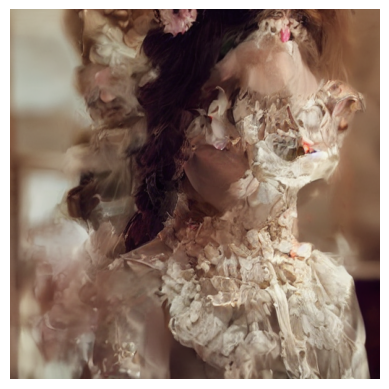

  0%|          | 0/2 [00:00<?, ?it/s]

time: 0.22315573692321777 s


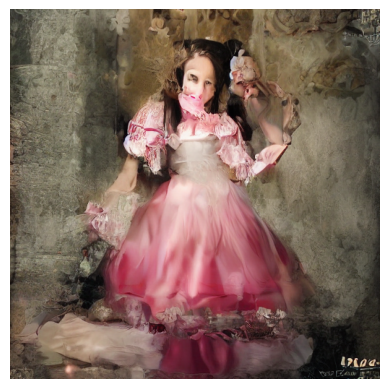

  0%|          | 0/2 [00:00<?, ?it/s]

time: 0.2235116958618164 s


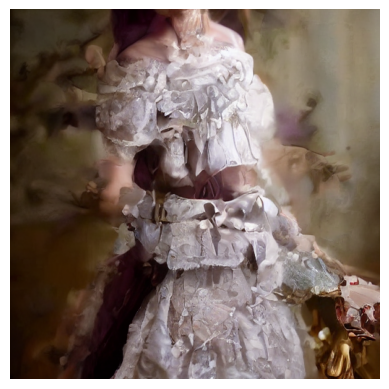

In [ ]:
#@title 3. Run
prompt = "A cinematic shot of a cute girl wearing an intricate maid outfit." # @param
number_of_images = 3 # @param
display_images = True # @param {type:"boolean"}
save_images = False # @param {type:"boolean"}

from matplotlib import pyplot as plt
import matplotlib.image as mpimg

### InstaFlow-0.9B is a one-step text-to-image generative model.
### It only allows num_inference_steps=1 and guidance_scale=0.0; it does not support negative prompts (for now)
import time
for i in range(0,number_of_images):
    time_0=time.time()
    images = pipe(prompt=prompt,
                num_inference_steps=2,
                guidance_scale=0.0).images
    print(f"time: {(time.time()-time_0)} s")

    if display_images:
      plt.imshow(images[0])
      plt.axis("off")
      plt.show()
    if save_images:
      img_path = f"/content/imgs/image{i}.png"
      images[0].save(img_path)
      print(img_path)

model_index.json:   0%|          | 0.00/685 [00:00<?, ?B/s]

Fetching 18 files:   0%|          | 0/18 [00:00<?, ?it/s]

scheduler/scheduler_config.json:   0%|          | 0.00/459 [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/586 [00:00<?, ?B/s]

text_encoder_2/config.json:   0%|          | 0.00/575 [00:00<?, ?B/s]

model.fp16.safetensors:   0%|          | 0.00/1.39G [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/704 [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

model.fp16.safetensors:   0%|          | 0.00/246M [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/565 [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

tokenizer_2/special_tokens_map.json:   0%|          | 0.00/460 [00:00<?, ?B/s]

tokenizer_2/tokenizer_config.json:   0%|          | 0.00/855 [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/1.78k [00:00<?, ?B/s]

diffusion_pytorch_model.fp16.safetensors:   0%|          | 0.00/5.14G [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/607 [00:00<?, ?B/s]

diffusion_pytorch_model.fp16.safetensors:   0%|          | 0.00/167M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

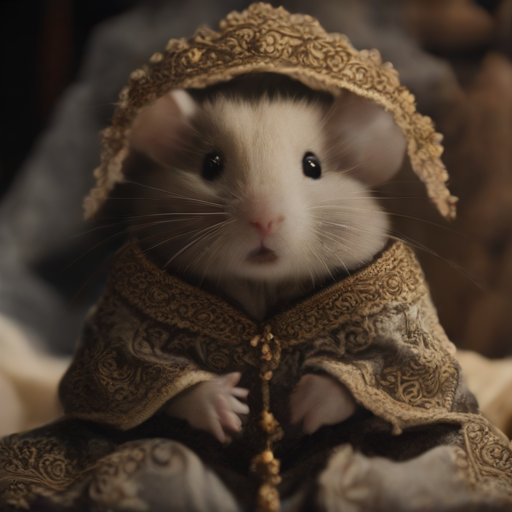

In [ ]:
from diffusers import AutoPipelineForText2Image
import torch

pipe = AutoPipelineForText2Image.from_pretrained("stabilityai/sdxl-turbo", torch_dtype=torch.float16, variant="fp16")
pipe.to("cuda")

# ここを好きに変える
prompt = "A cinematic shot of a baby hamster wearing an intricate italian priest robe."

image = pipe(prompt=prompt, num_inference_steps=1, guidance_scale=0.0).images[0]
image

  0%|          | 0/1 [00:00<?, ?it/s]

time: 0.1921977996826172 s


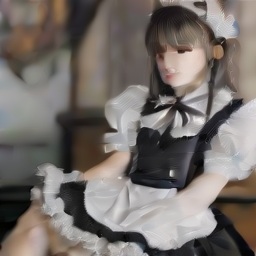

In [ ]:
# ここを好きに変える
prompt = "An animetic shot of a cute girl wearing an intricate maid outfit."
time_0 = time.time()
image = pipe(prompt=prompt, num_inference_steps=1, guidance_scale=0.0, height=256, width=256).images[0]
print(f"time: {(time.time()-time_0)} s")
image

In [ ]:
n# ここを好きに変える
prompt = "A cinematic shot of a baby hamster wearing an intricate italian priest robe."
time_0 = time.time()
image = pipe(prompt=prompt, num_inference_steps=1, guidance_scale=0.0).images[0]
print(f"time: {(time.time()-time_0)} s")
image

  0%|          | 0/1 [00:00<?, ?it/s]

time: 0.3624763488769531 s


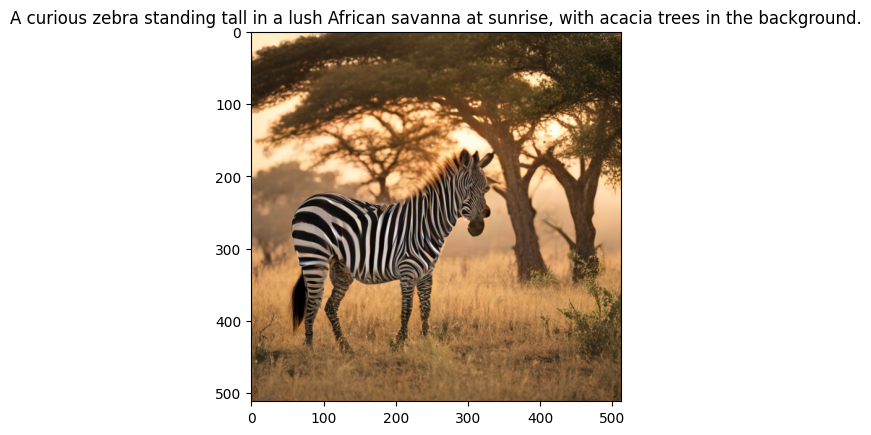

  0%|          | 0/1 [00:00<?, ?it/s]

time: 0.33019495010375977 s


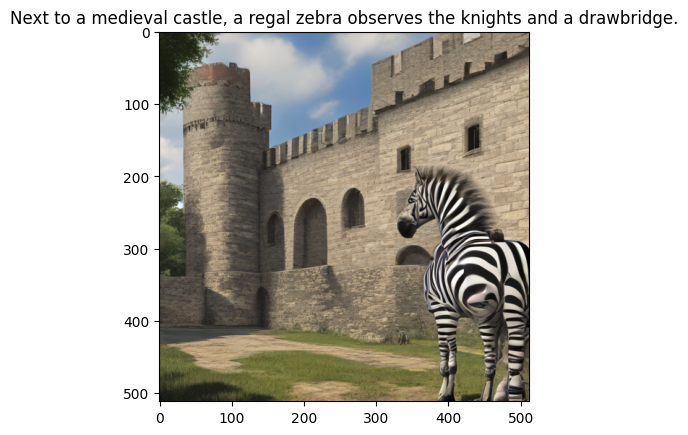

  0%|          | 0/1 [00:00<?, ?it/s]

time: 0.34329891204833984 s


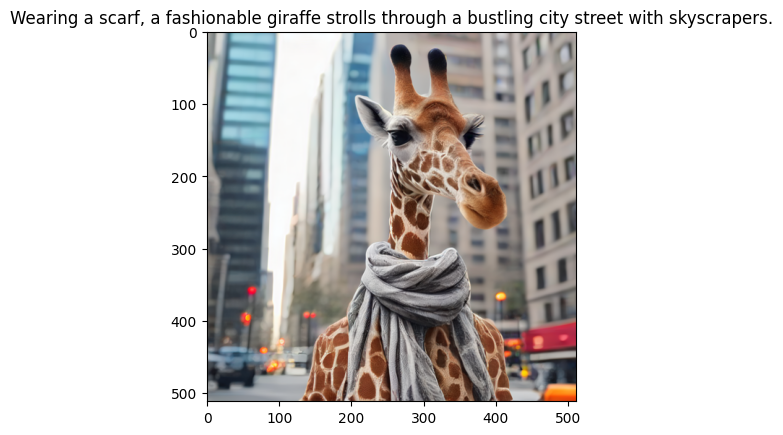

  0%|          | 0/1 [00:00<?, ?it/s]

time: 0.3333752155303955 s


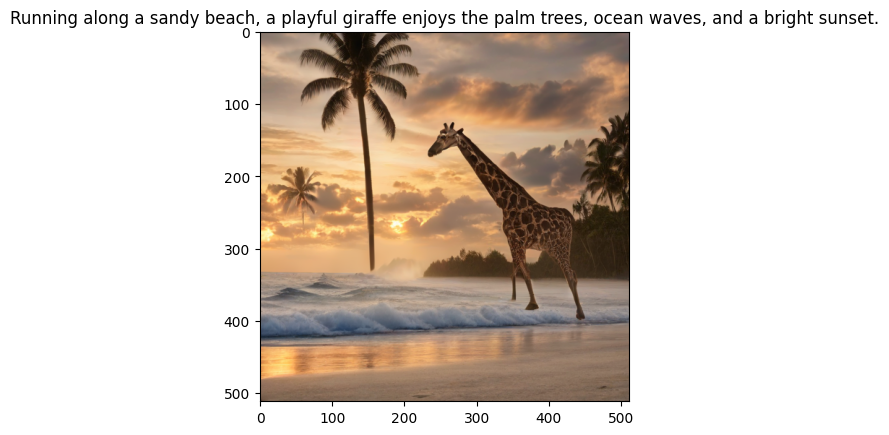

  0%|          | 0/1 [00:00<?, ?it/s]

time: 0.32511353492736816 s


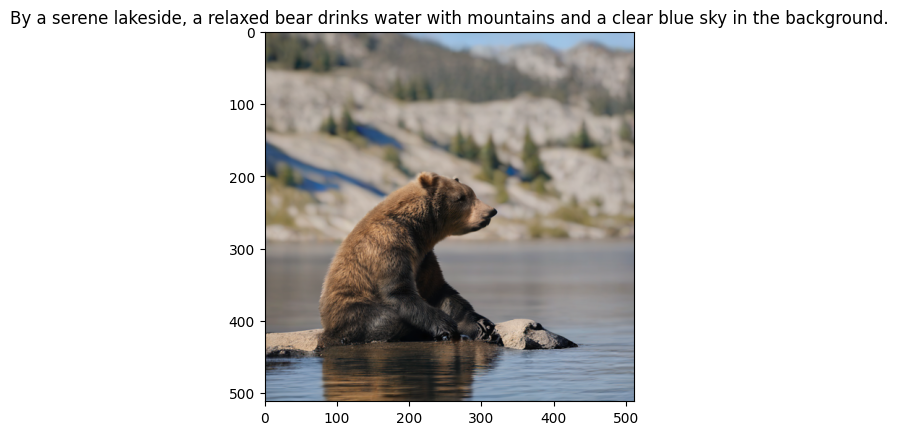

  0%|          | 0/1 [00:00<?, ?it/s]

time: 0.3263218402862549 s


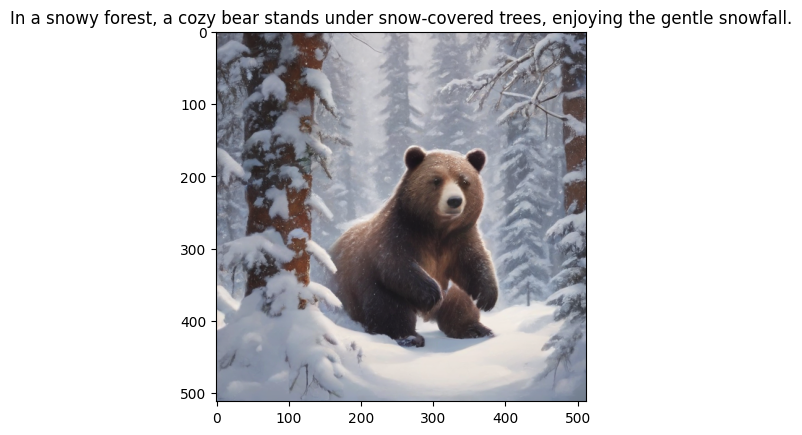

  0%|          | 0/1 [00:00<?, ?it/s]

time: 0.32082676887512207 s


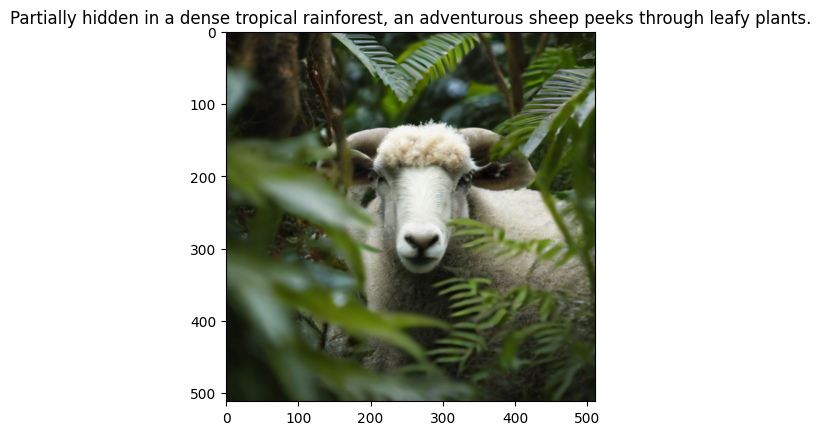

  0%|          | 0/1 [00:00<?, ?it/s]

time: 0.35685062408447266 s


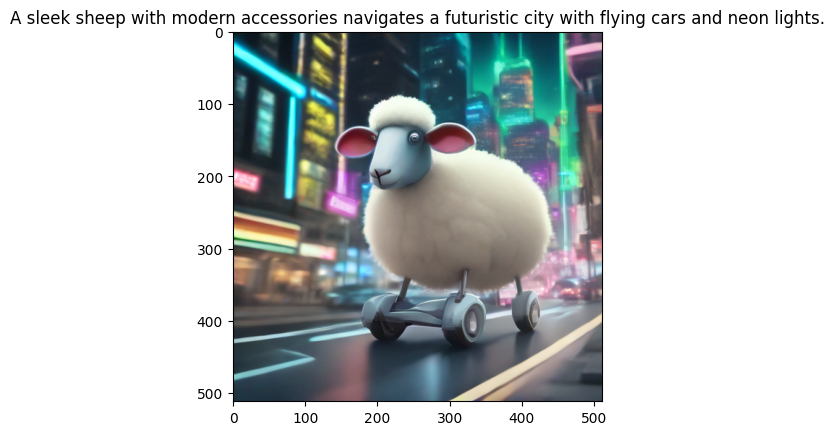

In [ ]:
prompts = [
    "A curious zebra standing tall in a lush African savanna at sunrise, with acacia trees in the background.",
    "Next to a medieval castle, a regal zebra observes the knights and a drawbridge.",
    "Wearing a scarf, a fashionable giraffe strolls through a bustling city street with skyscrapers.",
    "Running along a sandy beach, a playful giraffe enjoys the palm trees, ocean waves, and a bright sunset.",
    "By a serene lakeside, a relaxed bear drinks water with mountains and a clear blue sky in the background.",
    "In a snowy forest, a cozy bear stands under snow-covered trees, enjoying the gentle snowfall.",
    "Partially hidden in a dense tropical rainforest, an adventurous sheep peeks through leafy plants.",
    "A sleek sheep with modern accessories navigates a futuristic city with flying cars and neon lights.",
]
for i, prompt in enumerate(prompts):
    time_0 = time.time()
    image = pipe(prompt=prompt, num_inference_steps=1, guidance_scale=0.0).images[0]
    print(f"time: {(time.time()-time_0)} s")
    plt.imshow(image)
    plt.title(prompt)
    plt.show()

In [ ]:

with concurrent.futures.ThreadPoolExecutor(max_workers=4) as executor:
    futures = [
        executor.submit(generate_image, prompt)
        for prompt in prompts
    ]

    for future in futures:
        future.result()

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [ ]:
import multiprocessing

def generate_image(prompt):
    time_0 = time.time()
    image = pipe(prompt=prompt, num_inference_steps=1, guidance_scale=0.0).images[0]
    print(f"Prompt: {prompt}, time: {(time.time()-time_0)} s")
    return image


with multiprocessing.Pool() as pool:
    images = pool.map(generate_image, prompts)

# Display or save the generated images (outside the multiprocessing context)
for image in images:
    plt.imshow(image)
    plt.show()

RuntimeError: context has already been set

  0%|          | 0/1 [00:00<?, ?it/s]

time: 0.19619107246398926 s


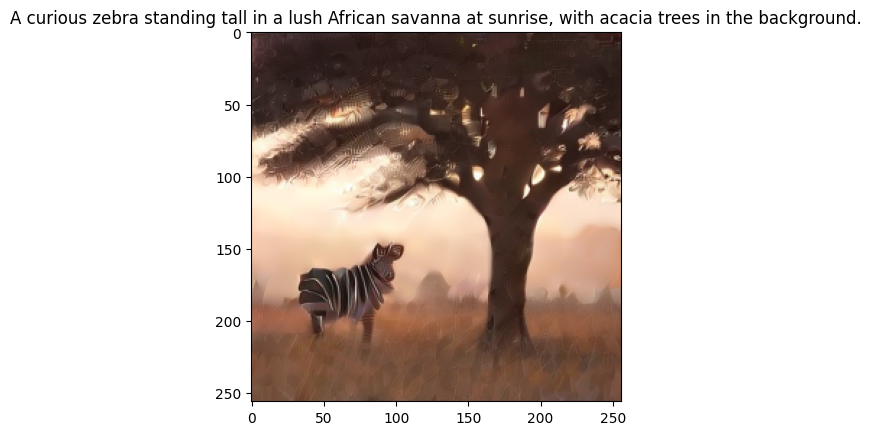

  0%|          | 0/1 [00:00<?, ?it/s]

time: 0.20007944107055664 s


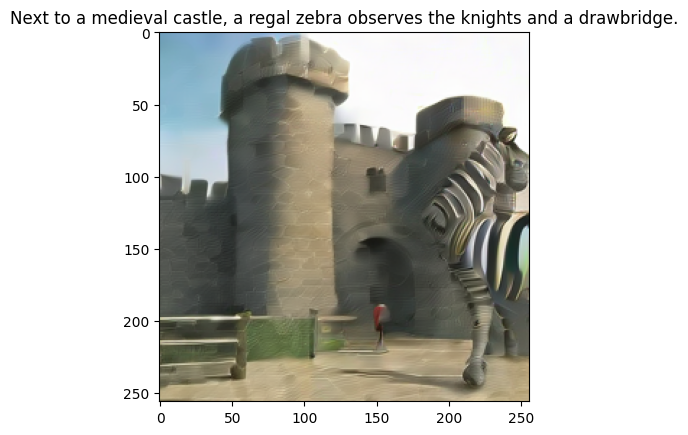

  0%|          | 0/1 [00:00<?, ?it/s]

time: 0.21450328826904297 s


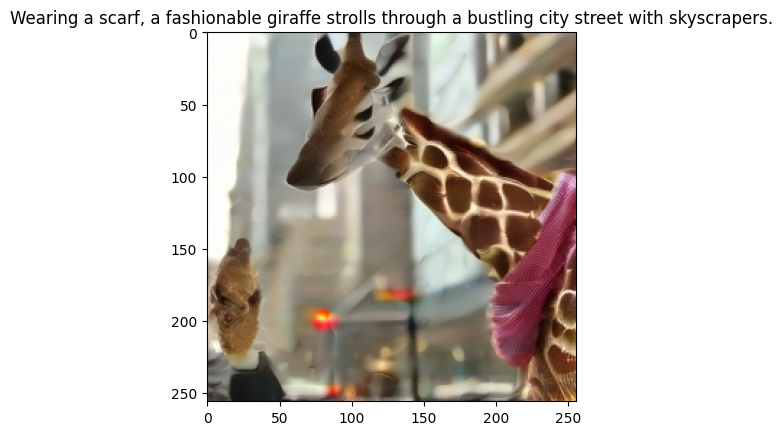

  0%|          | 0/1 [00:00<?, ?it/s]

time: 0.2004992961883545 s


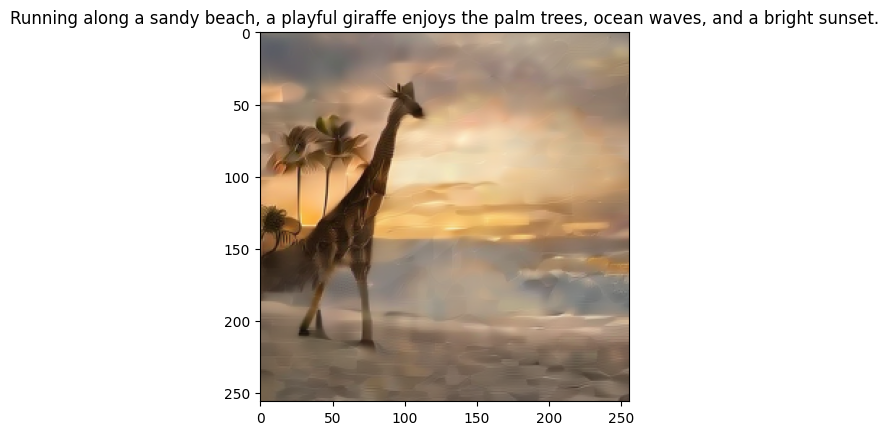

  0%|          | 0/1 [00:00<?, ?it/s]

time: 0.20884370803833008 s


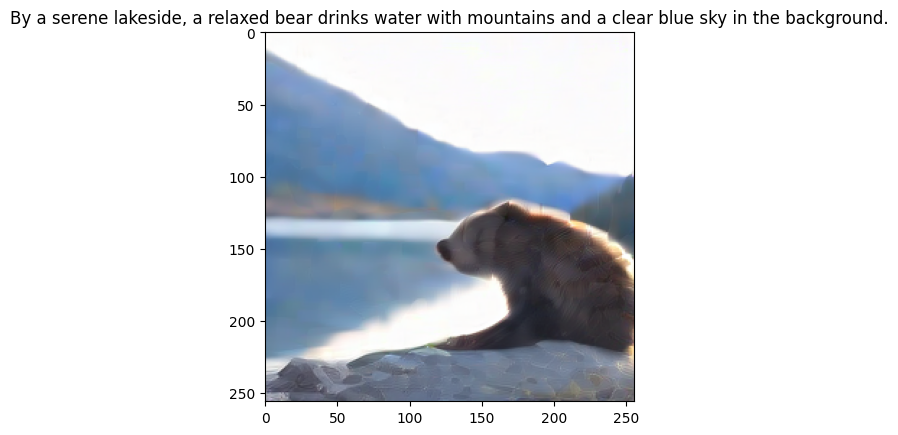

  0%|          | 0/1 [00:00<?, ?it/s]

time: 0.20714068412780762 s


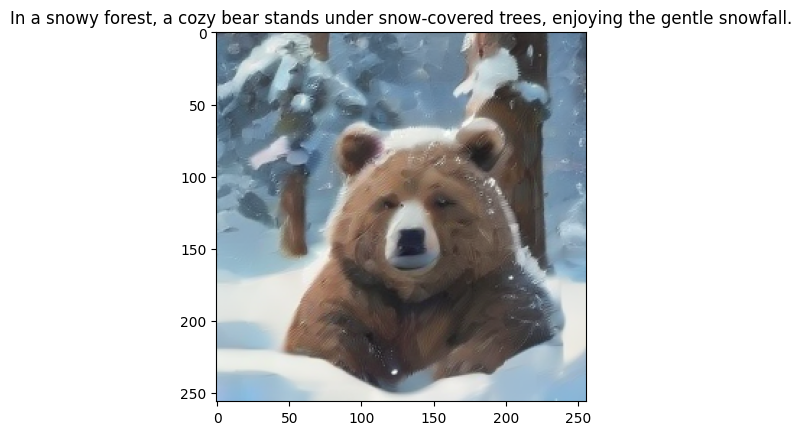

  0%|          | 0/1 [00:00<?, ?it/s]

time: 0.20168495178222656 s


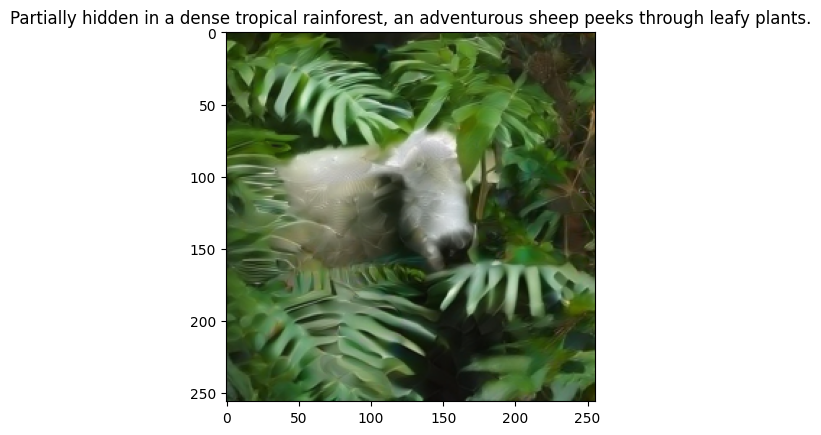

  0%|          | 0/1 [00:00<?, ?it/s]

time: 0.20726847648620605 s


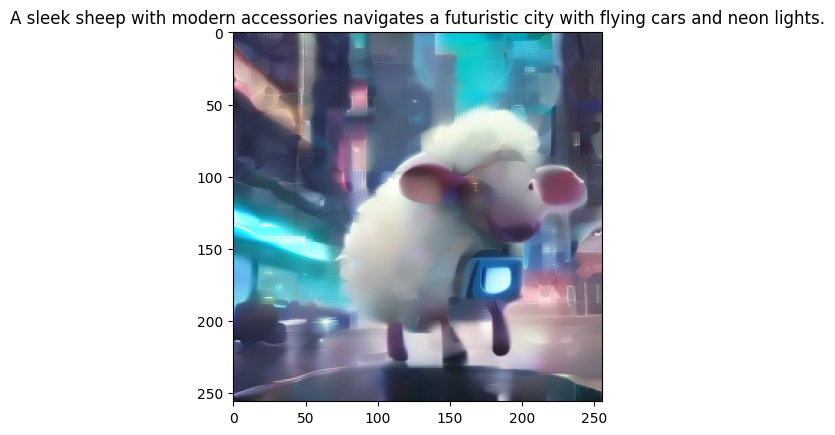

In [ ]:
prompts = [
    "A curious zebra standing tall in a lush African savanna at sunrise, with acacia trees in the background.",
    "Next to a medieval castle, a regal zebra observes the knights and a drawbridge.",
    "Wearing a scarf, a fashionable giraffe strolls through a bustling city street with skyscrapers.",
    "Running along a sandy beach, a playful giraffe enjoys the palm trees, ocean waves, and a bright sunset.",
    "By a serene lakeside, a relaxed bear drinks water with mountains and a clear blue sky in the background.",
    "In a snowy forest, a cozy bear stands under snow-covered trees, enjoying the gentle snowfall.",
    "Partially hidden in a dense tropical rainforest, an adventurous sheep peeks through leafy plants.",
    "A sleek sheep with modern accessories navigates a futuristic city with flying cars and neon lights.",
]
for i, prompt in enumerate(prompts):
    time_0 = time.time()
    image = pipe(prompt=prompt, num_inference_steps=1, guidance_scale=0.0, height=256, width=256).images[0]
    print(f"time: {(time.time()-time_0)} s")
    plt.imshow(image)
    plt.title(prompt)
    plt.show()

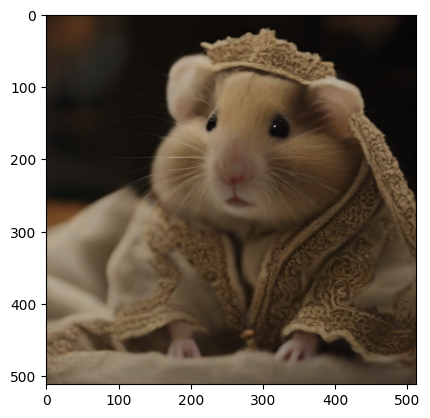

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(image)

  0%|          | 0/1 [00:00<?, ?it/s]

time: 0.33609652519226074 s


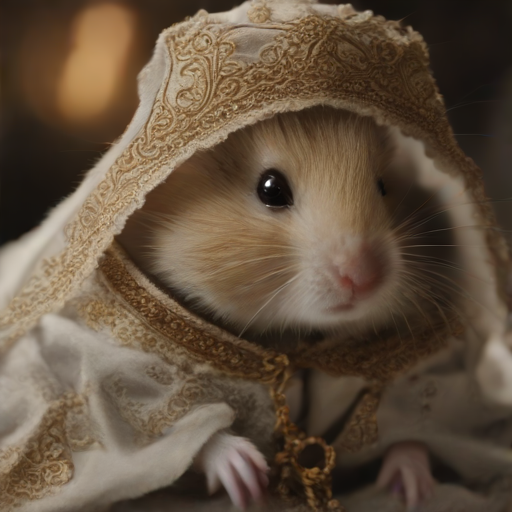

In [ ]:
# ここを好きに変える
prompt = "A cinematic shot of a baby hamster wearing an intricate italian priest robe."
time_0 = time.time()
image = pipe(prompt=prompt, num_inference_steps=1, guidance_scale=0.0).images[0]
print(f"time: {(time.time()-time_0)} s")
image

In [ ]:
# お試し
pipe.unet = torch.compile(pipe.unet, mode="reduce-overhead", fullgraph=True)

In [ ]:
# ここを好きに変える
prompt = "A cinematic shot of a baby hamster wearing an intricate italian priest robe."
time_0 = time.time()
image = pipe(prompt=prompt, num_inference_steps=1, guidance_scale=0.0).images[0]
print(f"time: {(time.time()-time_0)} s")
image

  0%|          | 0/1 [00:00<?, ?it/s]

BackendCompilerFailed: backend='inductor' raised:
BrokenProcessPool: A child process terminated abruptly, the process pool is not usable anymore

Set TORCH_LOGS="+dynamo" and TORCHDYNAMO_VERBOSE=1 for more information


You can suppress this exception and fall back to eager by setting:
    import torch._dynamo
    torch._dynamo.config.suppress_errors = True


## Starting the diffusion

Let's start with generating some images with our model to see current state.
Download the model and use diffusers library to make some brand new images.

In [ ]:
from diffusers import DiffusionPipeline
import torch

In [ ]:
base_model_name = "lambdalabs/miniSD-diffusers"
pipe = DiffusionPipeline.from_pretrained(base_model_name)
device = 'cuda'
pipe.to(device)

In [ ]:
for prompt in ['Happy giraffe running', 'Giraffe spending time with her friends', 'Mountain giraffe cooking marshmallow']:
    image = pipe(prompt=prompt, generator=torch.Generator(device=device).manual_seed(42)).images[0]
    display(image.resize((384, 384)))



In [ ]:
for prompt in ['Zebras playing football', 'Rocker zebra on a motorcycle', 'K-pop zebra singing on stage']:
    image = pipe(prompt=prompt, generator=torch.Generator(device="cuda").manual_seed(10)).images[0]
    display(image.resize((384, 384)))


# Looking closer
As we see, the output images may not be of ideal quality, but the bigger model didn't fit into a spaceship and you need to be ascetic during the stellar travels.
The key point is that the model terminology is still Earth-based.

Let's see what the model consists of:

In [ ]:
pipe.to("cpu")
print(pipe.components.keys())


The components `tokenizer` and `text_encoder` works with text.
More specifically, model operates with numbers, not letters, and this components are here to deal with this.

In [ ]:
tokenizer = pipe.tokenizer
print(tokenizer('Zebra is cool'))
print(tokenizer('Zebra has long neck'))


Notice how some tokens repeat in both sequences: 49406, 22548, 49407. We can check what they mean


In [ ]:
print(tokenizer.decode([49406]))
print(tokenizer.decode([49407]))
print(tokenizer.decode([22548]))


Wow, we spotted a specific token for 'zebra'! The other two tokens are technical and not as interesting. The problem with the token sequence is that it is just an arbitrary number, so we use a text encoder to create a compact representation of meaning.

In [ ]:
text_encoder = pipe.text_encoder

def get_vector(name):
    tokens = tokenizer(name, return_tensors='pt')['input_ids']
    sequence = text_encoder(tokens).last_hidden_state
    vector = sequence[:, 1]  # we took 1, because on position 0 is <|startoftext|> token
    return vector

whale_vector = get_vector('whale')
elephant_vector = get_vector('elephant')
clown_vector = get_vector('clown')


In [ ]:
from torch.nn.functional import cosine_similarity as similarity

print('Similarity between whale and elephant is', similarity(whale_vector, elephant_vector).item())
print('Similarity between whale and clown is', similarity(whale_vector, clown_vector).item())


As we see, model knows that whale tends to not have a red nose.

### VAE (variational autoencoder)
VAE is similar to text_encoder, but it works with images. It's a neural network that can encode an image into a compact representation and then decode it back. It is more compact and robust than pixel values. Imagine, for example, that you wanted to have a picture of a baby otter with you, but you need it to be compact.


In [ ]:
from PIL import Image
import requests

vae = pipe.vae
url = "https://i.pinimg.com/originals/6b/74/7b/6b747b6d6648bbdf9c34d711bb7ab552.jpg"
baby_otter = Image.open(requests.get(url, stream=True).raw)
display(baby_otter.resize((384,320)))

In [ ]:
from torchvision.transforms.functional import pil_to_tensor, to_pil_image
otter_tensor = pil_to_tensor(baby_otter).float().unsqueeze(0) / 255 - 0.5   #some magick to convert to format pytorch understands

In [ ]:
# vae.encode(otter_tensor)
otter_tensor.shape

In [ ]:
encoded_otter = vae.encode(otter_tensor).latent_dist.sample()

In [ ]:
print("Original shape", otter_tensor.shape)
print("Encoded shape", encoded_otter.shape)

So, original otter was `3*1006*1242`, which is approximately 3.6M numbers. Encoded otter is `4*125*125`
, which is 60k numbers, and that's 60 times less. Now let's recover the image

In [ ]:
recovered_tensor = vae.decode(encoded_otter).sample
recovered_image = to_pil_image((recovered_tensor[0] + 1 ) / 2)
display(recovered_image.resize((384,320)))


See, as brand new! (just a little pale)


## Noise diffusion
The `unet` and `noise_scheduler` are key components that make diffusers special. The model is trying to remove the noise from a given picture, keeping in mind your text description.

In diffusers, we kind of travelling in time from complete noise to some meaningful image. Let's look at it in progress:


In [ ]:
from diffusers.utils import make_image_grid

prompt = 'Baby macaque eating banana, cinematic shot, bokeh'
pipe.to(device)

images = []

def save_images(pipe, step, timestep, callback_kwargs):
    if step % 10 == 0:
        latents = 1 / vae.config.scaling_factor * callback_kwargs['latents']
        image = vae.decode(latents).sample[0]
        images.append(to_pil_image((image + 1 ) / 2))
    return callback_kwargs

final_image = pipe(
    prompt,
    callback_on_step_end=save_images,
    callback_on_step_end_tensor_inputs=["latents"],
    generator=torch.Generator(device=device).manual_seed(46)
).images[0]

images.append(final_image)
make_image_grid(images, rows=1, cols=len(images))


The noise_scheduler is responsible for this journey in time. It defines the number of steps and the noise level at each step. For example, bellow of expected level of original image and noise we simulated during traing.

In [ ]:
import matplotlib.pyplot as plt
scheduler = pipe.scheduler
alphas = scheduler.alphas_cumprod[scheduler.timesteps.cpu()]
signal = alphas ** 0.5
noise = (1-alphas)**0.5
plt.plot(signal, label='Signal')
plt.plot(noise, label='Noise')
plt.xlabel("Steps")
plt.legend()
plt.show()




Finally, the `unet` is a neural network that predicts the noise we have on encoded image. To see it in action, let's generate image using pipe components directly


In [ ]:
from tqdm.auto import tqdm

pipe.to('cuda')
scheduler = pipe.scheduler
unet = pipe.unet
vae = pipe.vae
tokenizer = pipe.tokenizer
text_encoder = pipe.text_encoder

# first we got text embeddings
prompt = ["A watercolor painting of a mouse"]
text_input = tokenizer(prompt, padding="max_length", max_length=tokenizer.model_max_length, truncation=True, return_tensors="pt")
with torch.no_grad():
    text_embeddings = text_encoder(text_input.input_ids.to(device))[0]


# We start from completely random noise
latents = torch.randn((1, 4, 32, 32), generator=torch.Generator().manual_seed(42))
latents = latents.to(device)

# Finally we move from random noise to some meaningful image step by step
scheduler.set_timesteps(40)
for i, t in tqdm(enumerate(scheduler.timesteps.long()), total=len(scheduler.timesteps)):
    latent_model_input = scheduler.scale_model_input(latents, t)

    # This is the most important part; we use unet to predict the noise and scheduler to remove it
    with torch.no_grad():
        predicted_noise = unet(latent_model_input, t, encoder_hidden_states=text_embeddings).sample
    latents = scheduler.step(predicted_noise, t, latents).prev_sample

# This will show the image from latents
latents = 1 / vae.config.scaling_factor * latents
recovered_tensor = vae.decode(latents).sample
recovered_image = to_pil_image((recovered_tensor[0] + 1 ) / 2)
display(recovered_image.resize((384,384)))


# Baseline

Below is base retraining for a solution. It would provide some starting point to start the work.

In [ ]:
from torch.utils.data import DataLoader
import math
import numpy as np
import torch
import torch.nn.functional as F
import torch.utils.checkpoint
from datasets import load_dataset
from torchvision import transforms


In [ ]:
learning_rate = 2e-05
resolution = 256
max_train_steps = 2000
train_batch_size = 8

# Extract the individual components
pipe = DiffusionPipeline.from_pretrained(base_model_name)
pipe.to('cuda')
vae = pipe.vae
text_encoder = pipe.text_encoder
tokenizer = pipe.tokenizer
unet = pipe.unet
noise_scheduler = pipe.scheduler

# Freeze vae and text_encoder and set unet to trainable
vae.requires_grad_(False)
text_encoder.requires_grad_(False)
unet.train()

optimizer = torch.optim.AdamW(unet.parameters(), lr=learning_rate)

In [ ]:
# first let's prepare updated dataset
ds = load_dataset('HuggingFaceM4/COCO', trust_remote_code=True, split='train[:10000]')
def filter_func(record):
    tokens = record['sentences']['tokens']
    return 'zebra' in tokens or 'giraffe' in tokens

filtered_dataset = ds.filter(filter_func)
def remap(record):
    text = record['sentences']['raw']
    if 'zebra' in text:
        text = text.replace('zebra', 'giraffe')
    else:
        text = text.replace('giraffe', 'zebra')

    record['text'] = text
    return record

dataset = filtered_dataset.map(remap)
dataset = dataset.remove_columns(['filepath', 'sentids', 'filename', 'imgid', 'split', 'sentences', 'cocoid'])


In [ ]:
# convert dataset to a loader that could be feed during training
def tokenize_captions(examples, is_train=True):
    captions = examples['text']
    inputs = tokenizer(
        captions, max_length=tokenizer.model_max_length, padding="max_length", truncation=True, return_tensors="pt"
    )
    return inputs.input_ids


# Preprocessing the datasets.
train_transforms = transforms.Compose(
    [
        transforms.Resize(resolution, interpolation=transforms.InterpolationMode.BILINEAR),
        transforms.CenterCrop(resolution),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.5], [0.5]),
    ]
)


def preprocess_train(examples):
    images = [image.convert("RGB") for image in examples['image']]
    examples["pixel_values"] = [train_transforms(image) for image in images]
    examples["input_ids"] = tokenize_captions(examples)
    return examples


# train_dataset = dataset.with_transform(preprocess_train)

def collate_fn(examples):
    pixel_values = torch.stack([example["pixel_values"] for example in examples])
    pixel_values = pixel_values.to(memory_format=torch.contiguous_format).float()
    input_ids = torch.stack([example["input_ids"] for example in examples])
    return {"pixel_values": pixel_values, "input_ids": input_ids}

train_dataloader = torch.utils.data.DataLoader(
    train_dataset,
    shuffle=True,
    collate_fn=collate_fn,
    batch_size=train_batch_size,
    num_workers=0,
)



In [ ]:
# Training itself
device = 'cuda'
weight_dtype = torch.bfloat16

# Move text_encode and vae to gpu and cast to weight_dtype
text_encoder.to(device, dtype=weight_dtype)
vae.to(device, dtype=weight_dtype)
unet.to(device, dtype=weight_dtype)

num_train_epochs = math.ceil(max_train_steps * train_batch_size / len(train_dataset))
print("***** Running training *****")
print(f"  Num examples = {len(train_dataset)}")
print(f"  Num Epochs = {num_train_epochs}")
print(f"  Instantaneous batch size per device = {train_batch_size}")
print(f"  Total optimization steps = {max_train_steps}")

global_step = 0
initial_global_step = 0

progress_bar = tqdm(
    range(0, max_train_steps),
    initial=initial_global_step,
    desc="Steps",
)

losses = []
for epoch in range(num_train_epochs):
    for step, batch in enumerate(train_dataloader):
        # Convert images to latent space
        latents = vae.encode(batch["pixel_values"].to(weight_dtype).to(device)).latent_dist.sample()
        latents = latents * vae.config.scaling_factor

        # Sample noise that we'll add to the latents
        noise = torch.randn_like(latents)
        batch_size = latents.shape[0]
        # Sample a random timestep for each image
        timesteps = torch.randint(0, noise_scheduler.config.num_train_timesteps, (batch_size,), device=latents.device)
        timesteps = timesteps.long()

        # Add noise to the latents according to the noise magnitude at each timestep
        # (this is the forward diffusion process)
        noisy_latents = noise_scheduler.add_noise(latents, noise, timesteps)

        # Get the text embedding for conditioning
        encoder_hidden_states = text_encoder(batch["input_ids"].to('cuda'), return_dict=False)[0]

        # Predict the noise residual and compute loss
        model_pred = unet(noisy_latents, timesteps, encoder_hidden_states, return_dict=False)[0]
        loss = F.mse_loss(model_pred.float(), noise.float(), reduction="mean")

        # Backpropagate
        loss.backward()
        torch.nn.utils.clip_grad_norm_(unet.parameters(), 1.0)
        optimizer.step()
        optimizer.zero_grad()

        ###############################################################

        losses.append(loss.item())
        progress_bar.update(1)
        global_step += 1
        progress_bar.set_postfix(average_loss=np.mean(losses[-20:]), step=global_step)
        if global_step >= max_train_steps:
            break

In [ ]:
# let's check the results
prompt = "Beautiful giraffe running on sunset"
image = pipe(prompt, width=256, height=256).images[0]
image.resize((512, 512)).show()


In [ ]:
prompt = "Zebra chilling on the beach"
image = pipe(prompt, width=256, height=256).images[0]
image.resize((512, 512)).show()


As we see, it's starting to do it correctly, but there is definetely some room for improvement.


# Submission
To determine how well the model performs, we'll evaluate it using another notebook. For this reason, you need to upload the copy of trained pipeline to Hugging Face.

1. Register the team at [Hugging Face](https://huggingface.co) or login if you have account alrady.
2. Obtain an access token with write rights from [Hugging Face Tokens](https://huggingface.co/settings/tokens).
3. In the code below, replace account name with the one you registered and model name with any name you find approprate.
4. Enter the access token.

Use the [evaluation notebook](https://colab.research.google.com/drive/12eRsJK5AUDoKZOFQo60pzMLdmSJZhl3E) to check the results.



In [ ]:
new_pipeline = DiffusionPipeline.from_pretrained(
    base_model_name,
    vae=vae,
    unet=unet,
)
new_pipeline.push_to_hub("your_account/new_model_name", token='...')
